# Importing all the required libraries

In [3]:
!pip install snscrape
import numpy as np
%matplotlib inline
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('wordnet')
from nltk import pos_tag
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import punkt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from matplotlib import pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Scraping Data from Twitter using snscrape 

In [4]:

import snscrape.modules.twitter as sntwitter


# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#goatdebate since:2022-08-20 until:2023-01-19').get_items()):
    if i>2000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
data = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

<ipython-input-4-d2e6227fead8>:11: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


In [5]:
#use this to read a stored dataset instead 
#data=pd.read_csv('goatdebatetweets.csv')

In [6]:
#reading the data
print('Extracted tweet data')
print(data.head())

Extracted tweet data
            User              Date Created  Number of Likes  \
0  KFCRADIOuncut 2023-01-18 14:43:55+00:00               25   
1       iconbagz 2023-01-17 02:02:49+00:00                0   
2  VanishonTokyo 2023-01-13 06:05:24+00:00                0   
3   kinger__john 2023-01-09 23:26:26+00:00                0   
4      bettitude 2023-01-09 20:03:31+00:00                1   

       Source of Tweet                                              Tweet  
0   Twitter for iPhone  The #GOATDebate is settled. The @PardonMyTake ...  
1  Twitter for Android  @metaphormessiah, @nu_jerz,Twork @CharlieClips...  
2  Twitter for Android  What is up with y'all saying MJ is better y'al...  
3  Twitter for Android  @FTFonFS1 how does @getnickwright not come bac...  
4               Buffer  On January 19, in a friendly match against a S...  


#Getting rid of special characters from the data(Text preprocessing)

In [7]:
# Text preprocessing
import re

In [8]:
def clean_text(Tweet):
    return ' '.join(re.sub("[^A-Za-z]+"," ",Tweet).split())

In [9]:
data['cleaned_tweet']=data['Tweet'].apply(lambda x: clean_text(x))

In [10]:
print("After removing special characters and symbols")
print(data)

After removing special characters and symbols
                User              Date Created  Number of Likes  \
0      KFCRADIOuncut 2023-01-18 14:43:55+00:00               25   
1           iconbagz 2023-01-17 02:02:49+00:00                0   
2      VanishonTokyo 2023-01-13 06:05:24+00:00                0   
3       kinger__john 2023-01-09 23:26:26+00:00                0   
4          bettitude 2023-01-09 20:03:31+00:00                1   
..               ...                       ...              ...   
216         Nicks592 2022-10-08 15:01:04+00:00                0   
217  LFC_Klopp_Salah 2022-10-06 18:48:26+00:00              172   
218   stefanederoger 2022-10-05 17:02:28+00:00                1   
219   AttorneyMmethi 2022-09-18 21:45:16+00:00                0   
220   LeAndreJames23 2022-09-01 05:18:33+00:00                0   

         Source of Tweet                                              Tweet  \
0     Twitter for iPhone  The #GOATDebate is settled. The @PardonMyTak

#Removing stopwords(further cleaning)

In [ ]:

stop_words=set(stopwords.words('english'))

In [13]:
#These are the stopwords that will be removed
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Import stopwords with nltk.
stop = stopwords.words('english')


# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['final'] = data['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))


In [15]:
print('After removing stopwords')
print(data['final'])

After removing stopwords
0      The GOATDebate settled The PardonMyTake crew g...
1      metaphormessiah nu jerz Twork CharlieClips TV ...
2      What saying MJ better need grow LeBron sad sti...
3      FTFonFS getnickwright come back kevinwildes sa...
4      On January friendly match Saudi star XI Cristi...
                             ...                        
216    Is Mbappe Haaland new Ronaldo Messi Debate GOA...
217          Football week GOATDebate https co BIe EexJH
218    After Roger retirement incredible journey watc...
219    If ever needed reason end GOAT debate us Messi...
220                                  Who goat goatdebate
Name: final, Length: 221, dtype: object


#Calculating sentiment scores

In [16]:
final=list(data['final'])


In [17]:
final=pd.DataFrame(final)

In [18]:
final.columns=['final']

In [19]:
def analyze_sentiment(Tweet):
    analysis=TextBlob(Tweet)
    if analysis.sentiment.polarity >0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [20]:
final['sentiment']=[str(analyze_sentiment(Tweet))
                       for Tweet in final.final]

In [21]:
print(final.sentiment.value_counts())

Positive    110
Neutral      95
Negative     16
Name: sentiment, dtype: int64


#Visualising for conclusions


In [22]:
new=data['final']

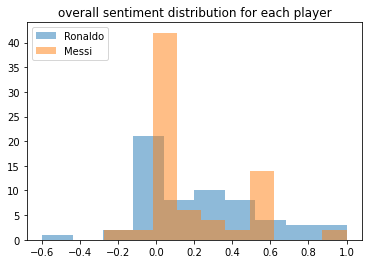

In [23]:
#overall sentiment distribution for each player
ronaldo_sentiments = []
messi_sentiments = []
for tweet in new:
    analysis = TextBlob(tweet)
    sentiment = analysis.sentiment.polarity
    if "Ronaldo" in tweet:
        ronaldo_sentiments.append(sentiment)
    elif "Messi" in tweet:
        messi_sentiments.append(sentiment)


plt.hist(ronaldo_sentiments, alpha=0.5, label='Ronaldo')
plt.hist(messi_sentiments, alpha=0.5, label='Messi')
plt.legend(loc='upper left')

plt.title("overall sentiment distribution for each player")
plt.show()

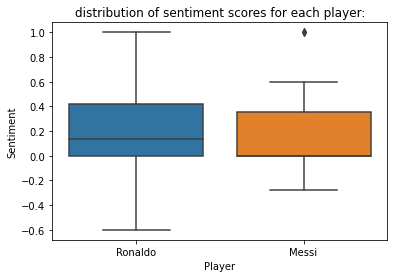

In [24]:
#box plot to show the distribution of sentiment scores for each player:
new2 = {'Player': ['Ronaldo'] * len(ronaldo_sentiments) + ['Messi'] * len(messi_sentiments),
        'Sentiment': ronaldo_sentiments + messi_sentiments}
df = pd.DataFrame(new2)

# Plot sentiment scores as a box plot

sns.boxplot(x='Player', y='Sentiment', data=df)
plt.title('distribution of sentiment scores for each player:')
plt.show()

In [25]:
ronaldo_words = ['Ronaldo', 'ronaldo', 'cristiano', 'cr7','CR7']
messi_words = ['Messi', 'messi', 'leo']

# Counter for each player
ronaldo_count = 0
messi_count = 0

# Loop through each tweet
for tweet in new:
    for ronaldo_word in ronaldo_words:
        if ronaldo_word in tweet:
            ronaldo_count += 1
            break
    for messi_word in messi_words:
        if messi_word in tweet:
            messi_count += 1
            break

# Print tweet count for each player
print('Ronaldo tweet count:', ronaldo_count)
print('Messi tweet count:', messi_count)

Ronaldo tweet count: 62
Messi tweet count: 129


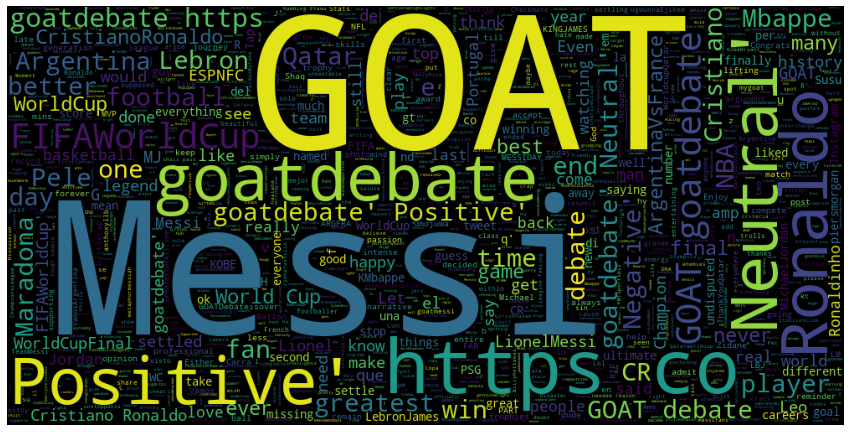

In [26]:
wordcloud1=WordCloud(width=1000,height=500,stopwords=stop_words,
                   max_words=5000,repeat=True).generate(
str(final.values))
                   
                   
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis("off")
#plt.title('Most used words',size=50)
plt.show()